In [1]:
# change theme of ipython notebooks
from IPython.core.display import HTML
import urllib2
HTML(urllib2.urlopen('http://bit.ly/1Bf5Hft').read())

In [2]:
import sklearn
import numpy as np
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris() # sklearn.datasets.base.Bunch

In [3]:
print iris.keys()
print iris.data.shape
print iris.target.shape
print iris.feature_names
print iris.target_names

['target_names', 'data', 'target', 'DESCR', 'feature_names']
(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [4]:
df = pd.DataFrame({iris.feature_names[0]:iris.data[:,0],
                  iris.feature_names[1]:iris.data[:,1],
                  iris.feature_names[2]:iris.data[:,2],
                  iris.feature_names[3]:iris.data[:,3],
                  'class':iris.target})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
class                150 non-null int64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [6]:
df.head()

,class,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
0,0,1.4,0.2,5.1,3.5
1,0,1.4,0.2,4.9,3.0
2,0,1.3,0.2,4.7,3.2
3,0,1.5,0.2,4.6,3.1
4,0,1.4,0.2,5.0,3.6


In [7]:
df['class'].unique()

array([0, 1, 2])

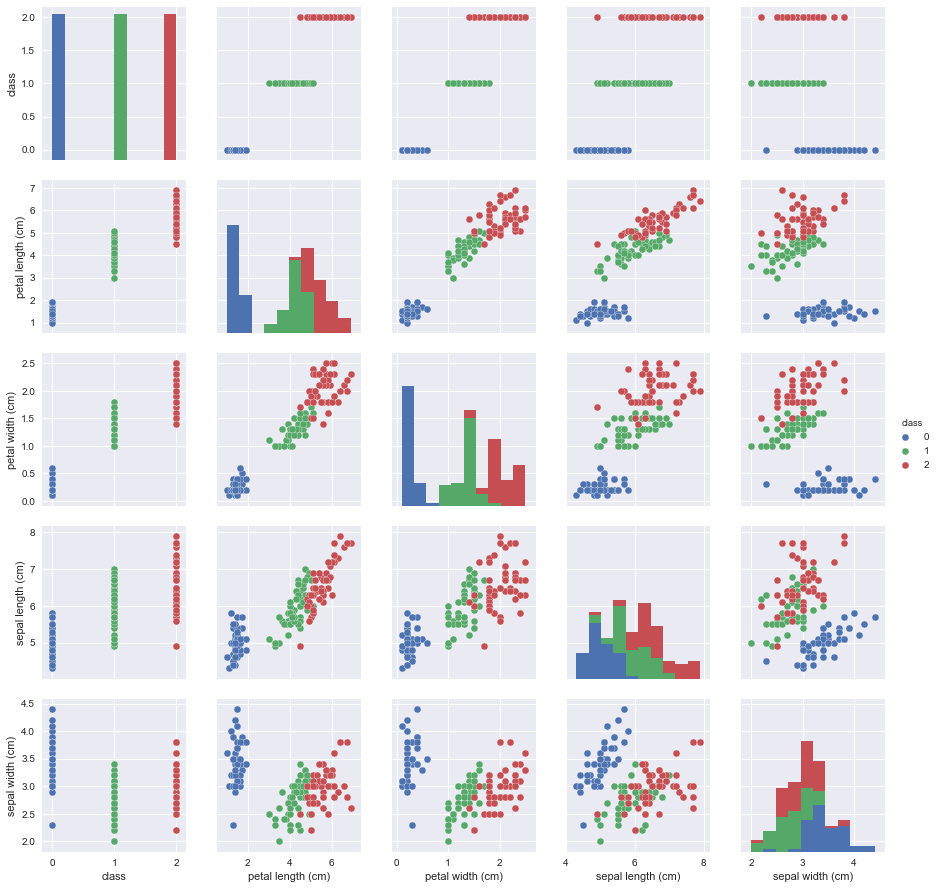

In [10]:
import seaborn as sb
%matplotlib inline
sb.pairplot(df, hue = 'class')

In [17]:
df.columns

Index([u'class', u'petal length (cm)', u'petal width (cm)',
       u'sepal length (cm)', u'sepal width (cm)'],
      dtype='object')

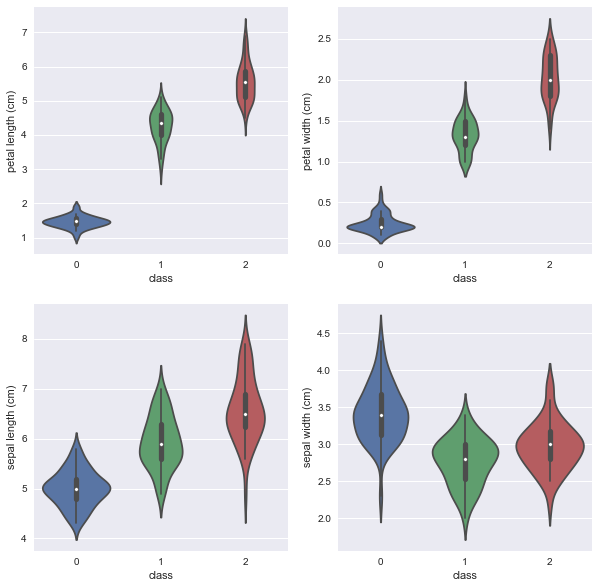

In [18]:
plt.figure(figsize=(10, 10))
index = 0
for column in df.columns:
    if column == 'class':
        continue
    index +=1
    plt.subplot(2, 2, index)
    sb.violinplot(x='class', y=column, data=df)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=0)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
from sklearn.metrics import accuracy_score,fbeta_score

pred=clf.predict(X_test)
print accuracy_score(y_test, pred)

0.977777777778


In [12]:
import matplotlib.pyplot as plt
def feature_plot(importances, X_train,num):   
    # Display top num most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:num]]
    values = importances[indices][:num]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Four Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(num), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(num) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(num), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12) 
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()

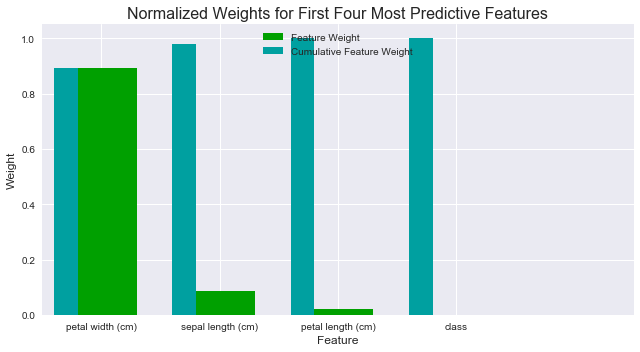

In [13]:
feature_plot(clf.feature_importances_,df,4)

In [19]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')